# SPIRE / BLAST-TNG Diff Analyis

Manipulate BLAST-TNG image to fit to Herschel/SPIRE photometer maps.

## 1. Load Maps

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors

spire_file = os.path.join(os.getcwd(), 'maps', 'spire_hiresPLW.npy')
blasttng_file = os.path.join(os.getcwd(), 'maps', 'blasttng_it2.npy')
spire_map = np.load(spire_file)
blasttng_map = np.load(blasttng_file)

## 2. Show Side-By-Side

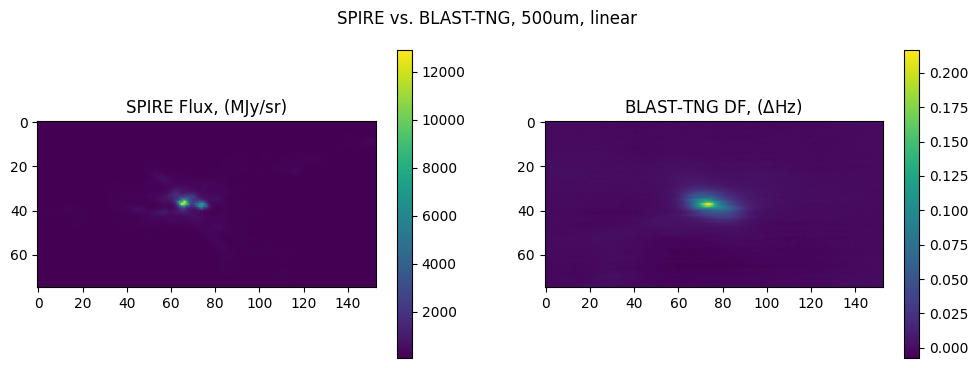

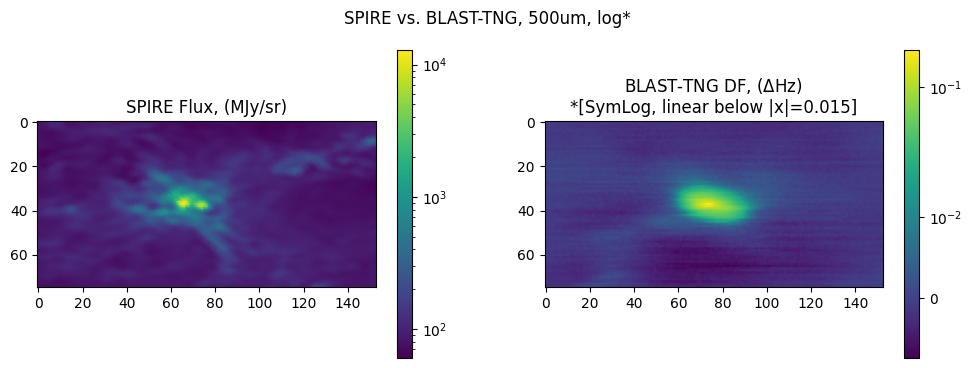

In [42]:

def plot_side_by_side(img1, img2,
                      parent_title=None,
                      title1=None, title2=None,
                      norm1=None, norm2=None,
                      offset1=0, offset2=0):
    parent, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12, 4))
    parent.suptitle(parent_title)
    fig1 = ax1.imshow(img1 + offset1, norm=norm1)
    ax1.set_title(title1)
    plt.colorbar(fig1, ax=ax1)
    fig2 = ax2.imshow(img2 + offset2, norm=norm2)
    ax2.set_title(title2)
    plt.colorbar(fig2, ax=ax2)
    plt.show()

plot_side_by_side(spire_map, blasttng_map,
                  title1='SPIRE Flux, (MJy/sr)', title2=r'BLAST-TNG DF, ($\Delta$Hz)',
                  parent_title='SPIRE vs. BLAST-TNG, 500um, linear')

symlog_linthresh = 0.015
plot_side_by_side(spire_map, blasttng_map,
                  title1='SPIRE Flux, (MJy/sr)',
                  title2=r'BLAST-TNG DF, ($\Delta$Hz)'f'\n*[SymLog, linear below |x|={symlog_linthresh}]',
                  parent_title='SPIRE vs. BLAST-TNG, 500um, log*',
                  norm1=colors.LogNorm(), norm2=colors.SymLogNorm(symlog_linthresh))

## 3. Determine Optimal Gaussian Blur

We see that the BLAST-TNG image is subject to significant "blurring". In order to produce an interpretable difference map, we aim to apply a gaussian blur to the SPIRE image to mimic the effect of the beam Point Spread Function and pointing solution error.